# Antikythera processing

This script is meant to create an oracle and then fit the behavior using bayesian methods in order to follow the analysis of papers related to the clickspring stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


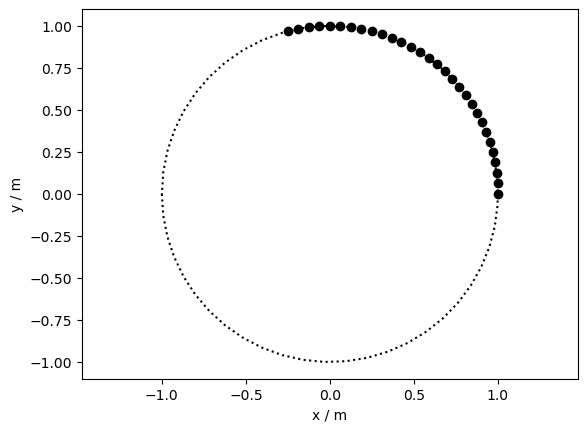

In [2]:
N = 100 # number of holes in full ring
r = 1 # m radius of holes
j = 30 # number of holes in partially reconstructed wrek

theta_holes = 2*np.pi*np.arange(0, j)/N
x_holes = r*np.cos(theta_holes)
y_holes = r*np.sin(theta_holes)

theta_circ = np.linspace(-np.pi, np.pi)

plt.plot(x_holes, y_holes, "ko")
plt.plot(r*np.cos(theta_circ), r*np.sin(theta_circ), "k:")
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.axis('equal')
plt.show()

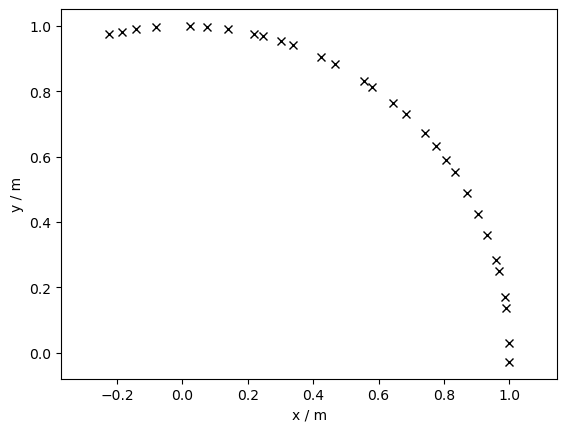

In [37]:
sigma_r = 0.0001 # m error in the radial direction
sigma_t = 0.02 # error in the tangential direction

noisy = np.empty([2, j])

for i in range(j):
    this_theta = theta_holes[i]
    R = np.array([[np.cos(this_theta), np.sin(this_theta)],
                  [np.sin(this_theta), -np.cos(this_theta)]])
    noise = np.diag([sigma_r, sigma_t])@np.random.randn(2, 1)
    point = np.c_[[x_holes[i], y_holes[i]]]
    noisy[:, i] = np.squeeze(R@noise + point)

plt.plot(noisy[0, :], noisy[1, :], "kx")
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.axis('equal')
plt.show()